# Part I - (prosper Loan Data Exploration)
## by ( Manar Altalhi )

## Introduction

> This data set contains 113,937 loans with variables of each loan.

 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df= pd.read_csv('prosperLoanData.csv')
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
70090,7CEF35927954891932BD8F4,987090,2013-10-18 12:59:01.117000000,NaN,60,Current,NaN,0.30337,0.2769,0.2669,...,-25.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,138
33761,B02433768433738898F7C6D,74591,2006-12-14 10:00:07.997000000,HR,36,Chargedoff,2008-01-26 00:00:00,0.29776,0.2900,0.2850,...,-7.40,-41.55,2633.25,2654.47,0.0,1.0,0,0,0.0,37
83399,3C253551320759344E894ED,604799,2012-06-26 16:02:58.377000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-27.05,0.00,0.00,0.00,0.0,1.0,0,0,0.0,27
94312,62D1336622135650633EDCF,11718,2006-05-06 16:19:48.437000000,E,36,Completed,2008-10-27 00:00:00,0.24502,0.2375,0.2325,...,-27.20,0.00,0.00,0.00,0.0,1.0,0,0,0.0,24
63536,1D9B3600457390000919B5E,1123909,2014-01-21 10:46:15.807000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-21.23,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
103981,9386341311208083411451D,275507,2008-02-04 04:26:41.100000000,AA,36,Completed,2009-05-29 00:00:00,0.08684,0.0800,0.0800,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,129
54324,FE7C360298556832183767A,1145917,2014-02-07 13:08:32.657000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
25217,BA2935525575252283E3D02,610679,2012-07-11 14:19:43.560000000,NaN,36,Defaulted,2013-03-16 00:00:00,0.35797,0.3177,0.3077,...,-6.68,0.00,3879.82,3879.82,0.0,1.0,0,0,0.0,72
6171,95F735893234257721D2BDF,913777,2013-09-20 03:13:51.753000000,NaN,60,Current,NaN,0.29618,0.2699,0.2599,...,-41.22,0.00,0.00,0.00,0.0,1.0,0,0,0.0,53
56138,BCB63552980499324374CFC,615869,2012-07-23 20:45:35.367000000,NaN,60,Completed,2013-01-10 00:00:00,0.15936,0.1364,0.1264,...,-5.59,0.00,0.00,0.00,0.0,1.0,0,0,0.0,22


### What is the structure of your dataset?

>This data set contains 113,937 loans
  with 81 features including : LoanStatus,BorrowerAPR,EmploymentStatus,LoanOriginalAmount and others


### What is/are the main feature(s) of interest in your dataset?

>I'm interested in determining how loan statute depends on other features like: employment statute loan amount
 and i want to see how BorrowerAPR depende on loan amount


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think the loan staute is the most important feature along with employmentstaute,loanoriginalamount and BorrowerAPR

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: loan staute.


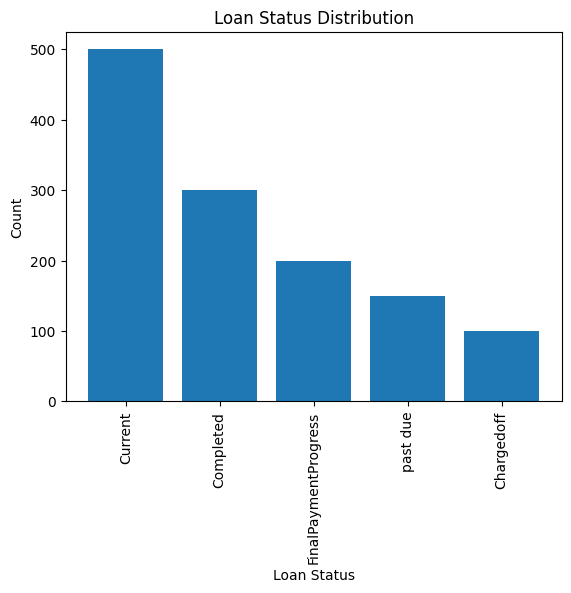

In [5]:
# plotting Loan Status
# Loan status categories and their corresponding counts
loan_status_categories = ['Current', 'Completed', 'FinalPaymentProgress', 'past due', 'Chargedoff','Defaulted']
loan_status_counts = [500, 300, 200, 150, 100]

# Order the loan status categories based on count in descending order
ordered_categories = [x for _, x in sorted(zip(loan_status_counts, loan_status_categories), reverse=True)]

# Create the bar plot
plt.bar(range(len(loan_status_counts)), loan_status_counts)

# Set the x-axis tick labels to the ordered categories
plt.xticks(range(len(loan_status_counts)), ordered_categories)

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.xticks(rotation="vertical")

plt.show()

> the most loan stat is current followed by completed and its apper to be 0 for canceld

> now i'll move to employment staute

<function matplotlib.pyplot.show(close=None, block=None)>

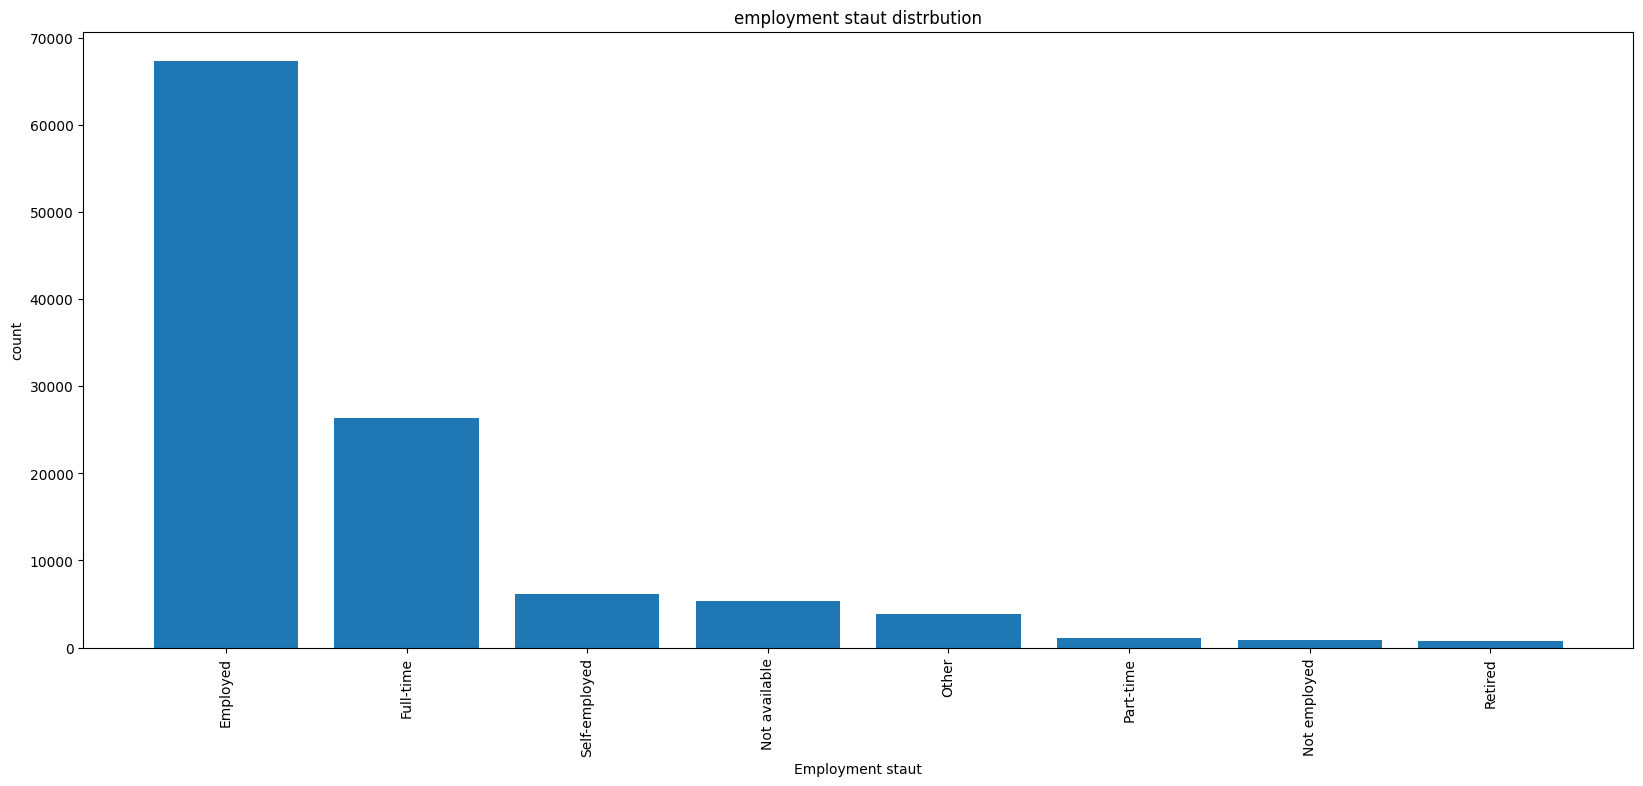

In [6]:
# plotting Employment staut 
plt.figure(figsize=[20,8])
plt.bar(x = df.EmploymentStatus.value_counts().keys(), height = df.EmploymentStatus.value_counts() )
plt.title('employment staut distrbution')
plt.xlabel('Employment staut')
plt.ylabel('count')
plt.xticks(rotation="vertical")
plt.show

>we can see that the most browerrs are employed follwed by full time 

> now i'll move to : Loan Original Amount 

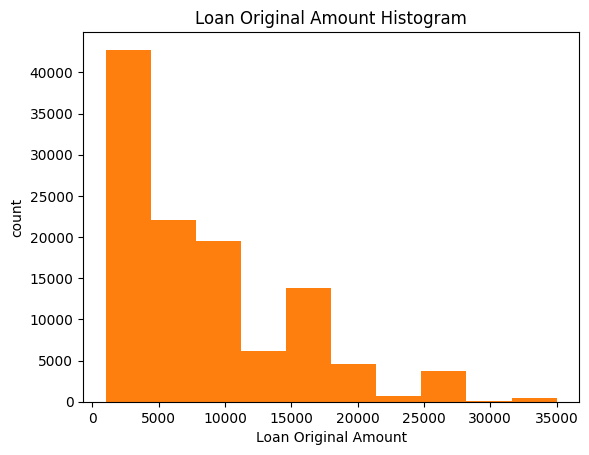

In [13]:
# plotting Loan Original Amount 
def x_y_z(xl, yl, title):
   # Set the x-axis label, y-axis label, and title
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    # Create a histogram
    plt.hist(data = df, x = 'LoanOriginalAmount', color=sns.color_palette()[1])
    # Show the plot
    plt.show()
# Call the function
x_y_z("Loan Original Amount", "count", "Loan Original Amount Histogram")


> we can see that the most barrowed amount is about 4500

>last variable is: BorrowerAPR

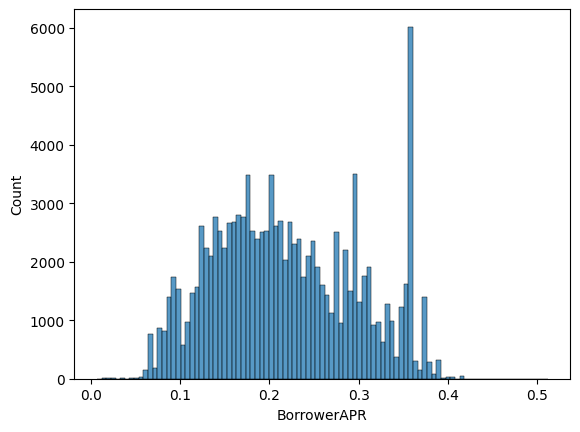

In [30]:
# plotting BorrowerAPR 

sns.histplot(x='BorrowerAPR', data=df);

>we can see that the highest BorrowerAPR is about 0.35

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i don't think there any unusual point all graphs appear to be normally distributed and i didn't need to perform any transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Regarding to the original loan amount, I discovered that it is  containing more than one peak, 

## Bivariate Exploration

> I would like to look at the loan statute , correlations present between features such as: employmentstatute, loanoriginalamount 
and correlation between BorrowerAPR and loanoriginalamount 


> at first let's look at BorrowerAPR and LoanOriginalAmount

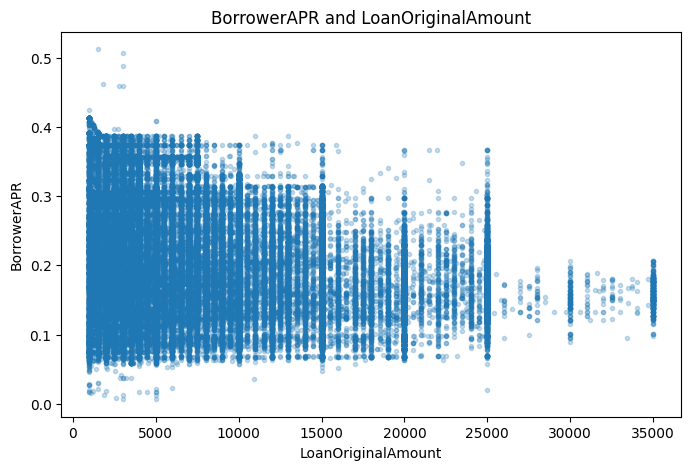

In [12]:

plt.figure(figsize=[8,5])
plt.scatter((df['LoanOriginalAmount']), df['BorrowerAPR'], alpha = 0.25, marker = '.' )
plt.title('BorrowerAPR and LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.show()

>  as we can see the more the amount increases the Borrower APR appear decreases

> now let's look at loan staute dependency on LoanOriginalAmount

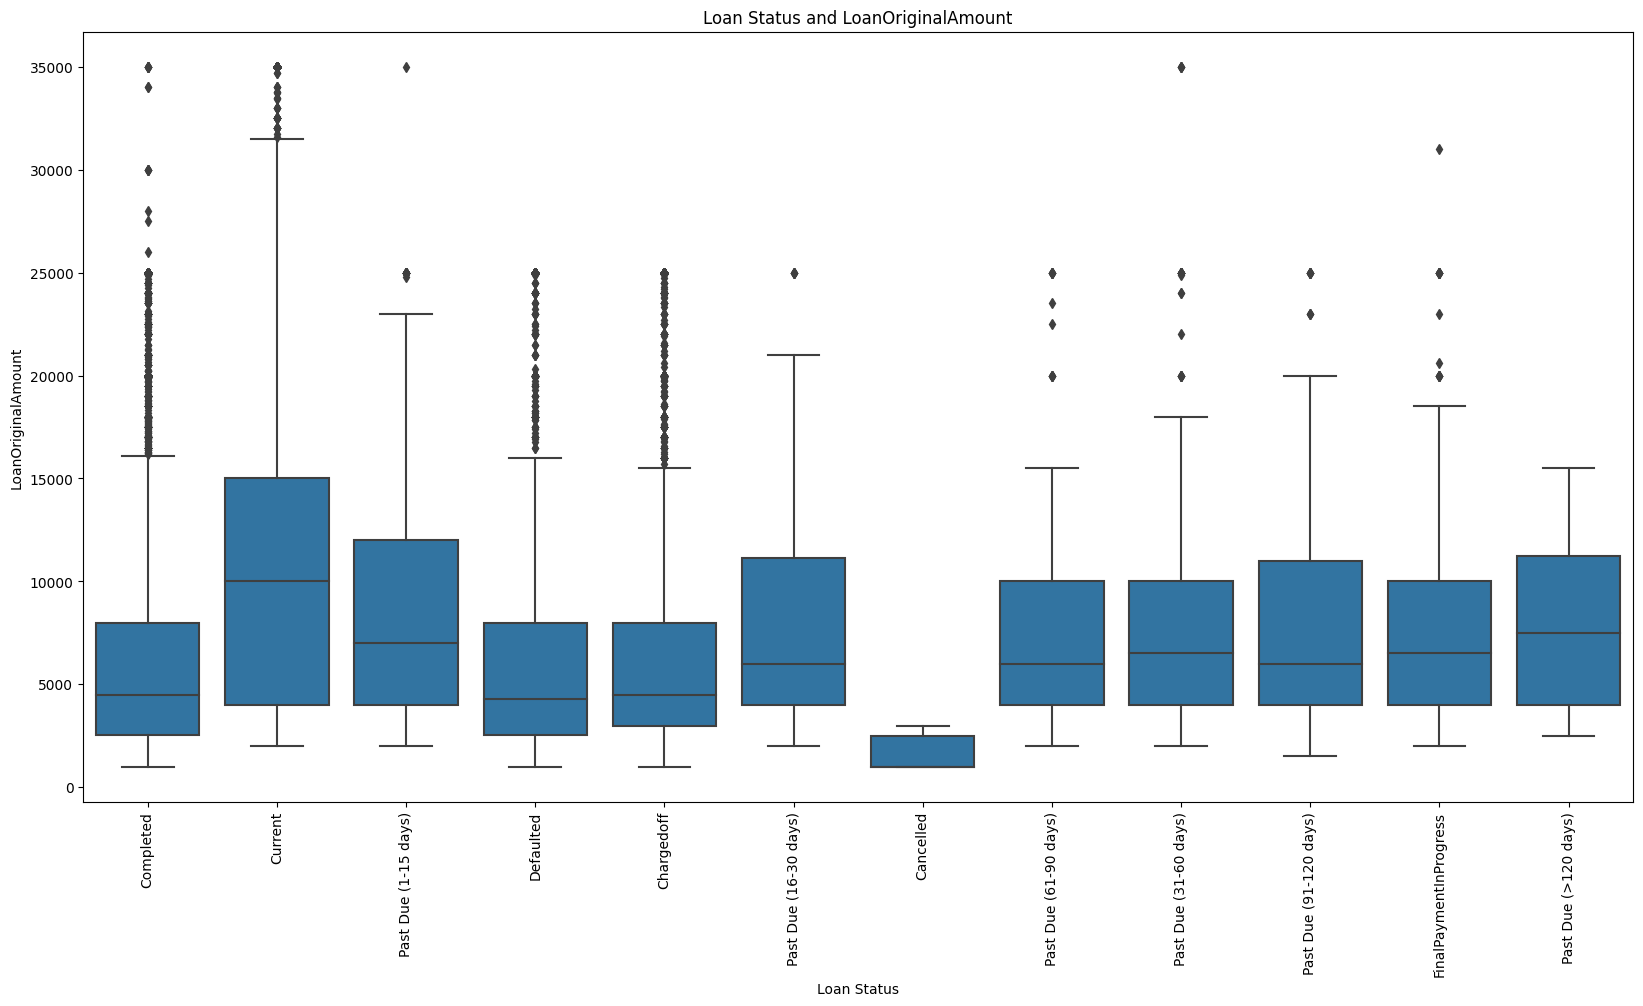

In [37]:
plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = 'tab:blue')
plt.title('Loan Status and LoanOriginalAmount')
plt.xlabel('Loan Status')
plt.ylabel('LoanOriginalAmount')
plt.xticks(rotation="vertical")

plt.show()

> we can see that largest loan amount is in "current" state 

> now let's look at loan staute dependency on EmploymentStatus

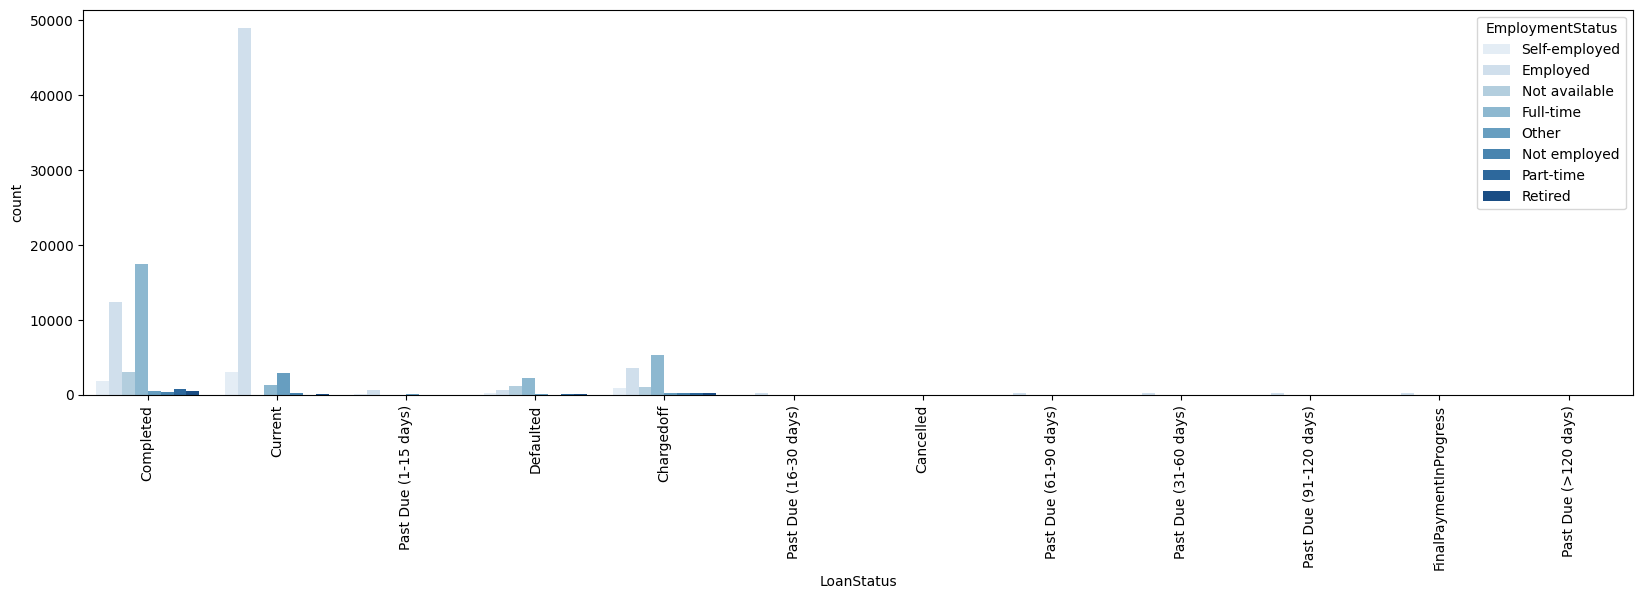

In [21]:
plt.figure(figsize = [20, 5])
plt.xticks(rotation="vertical")
sns.countplot(data =df, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues');

> as we can see the most Borrowers in "current" staute are "employeed" and in "completed" are "full_time"

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  the more the amount increases the Borrower APR appear decreases


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  the most Borrowers in "current" staute are "employeed" and in "completed" are "full_time"

## Multivariate Exploration

## EmploymentStatus and Loan Original Amount vs LoanStatus



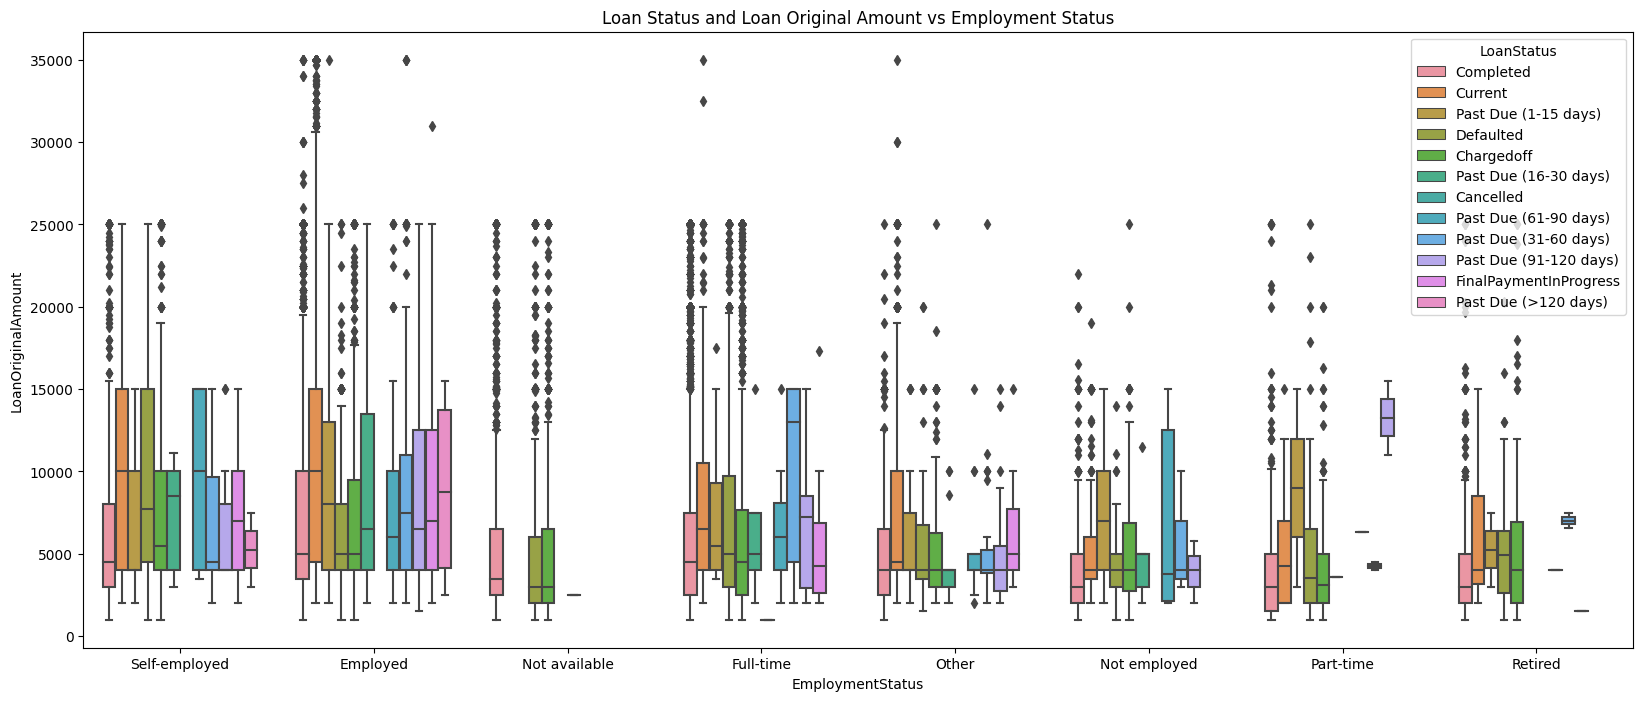

In [4]:
plt.figure(figsize = [20, 8])
sns.boxplot(data=df, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus');
plt.title('Loan Status and Loan Original Amount vs Employment Status');


>we can see that "Current" are the highest amount while "Completed" Loan are the lowest   

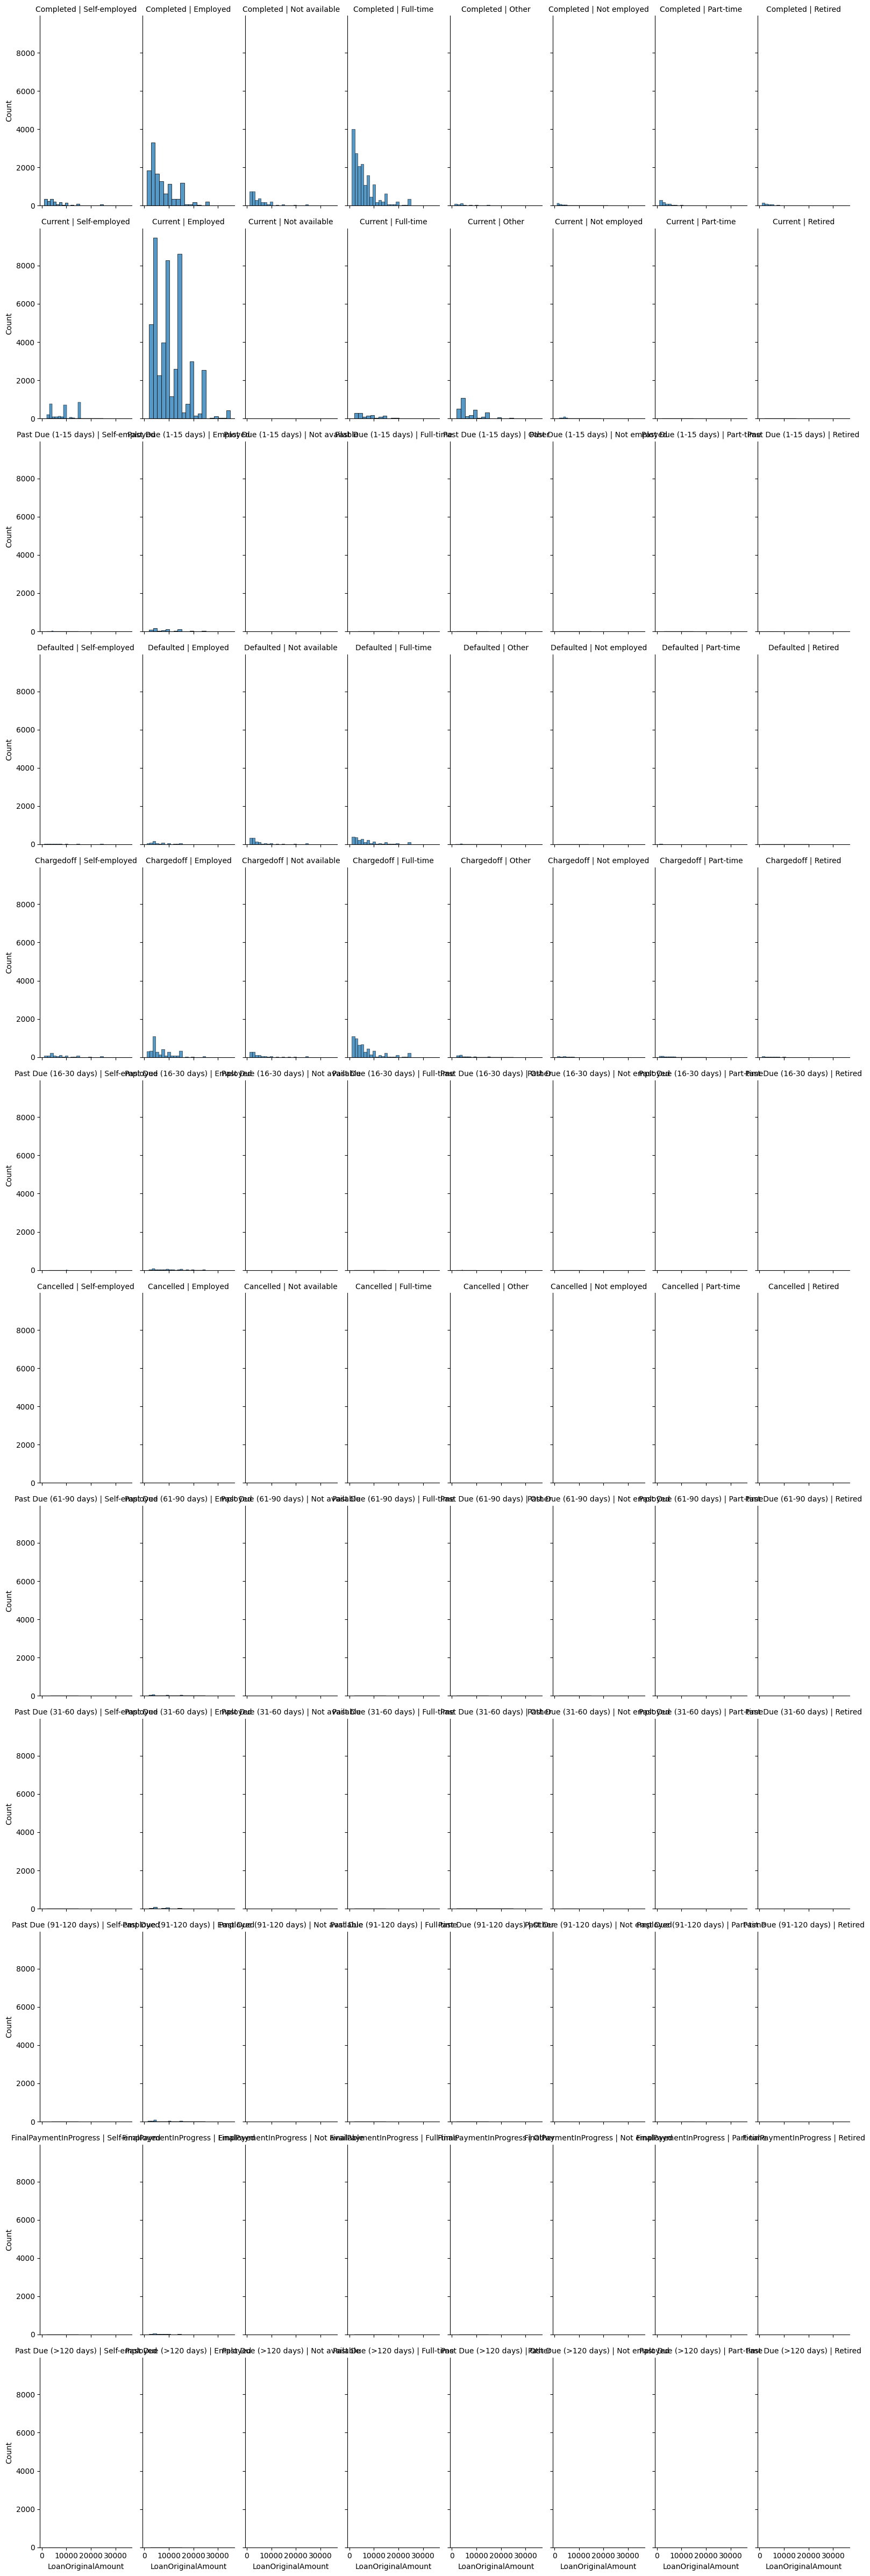

In [3]:

borrower_apr = df['LoanOriginalAmount']
employment_status = df['EmploymentStatus']
loan_status = df['LoanStatus']
g = sns.FacetGrid(df, col='EmploymentStatus', row='LoanStatus', height=4, aspect=0.5)
g.map(sns.histplot, 'LoanOriginalAmount', bins=20)
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.tight_layout()
plt.show()

> we can see that the most loans staute in "current"  is for "employeed" and the "original amount" is  from 10,000 to 30,000.
 As for the loan status "complete", it will be more at "full time" and the original amount" is approximately 10,000.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that the most loans staute in "current"  is for "employeed" and the "original amount" is  from 10,000 to 30,000.
 As for the loan status "complete", it will be more at "full time" and the original amount" is approximately 10,000.

### Were there any interesting or surprising interactions between features?

> the "past_due" loan staute is highe in "employed" staute.